## Load libraries

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [10]:
import sklearn
from sklearn import datasets
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import DBSCAN

from giotto.mapper.cover import CubicalCover
from giotto.mapper.mapper import make_mapper_pipeline
from giotto.mapper.filter import Projection
from giotto.mapper.visualize import create_network_2d

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Simulate data

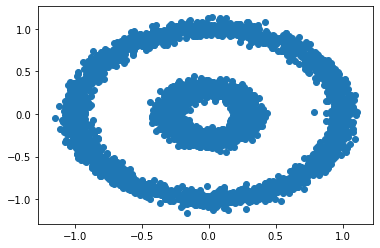

In [3]:
data, labels = datasets.make_circles(n_samples=5000, noise=0.05, factor=0.3)
plt.scatter(data[:,0], data[:, 1]);

## Configure Mapper pipeline

In [33]:
# define filter function - can be any scikit-learn Transformer
filter_func = Projection(column_indices=1)
# define cover - only one type is available at the moment
cover = CubicalCover(n_intervals=20, overlap_frac=0.1)
# choose clustering algorithm - default is DBSCAN
clusterer = DBSCAN(eps=0.5)

In [34]:
# initialise pipeline
n_jobs_outer = 1

pipe = make_mapper_pipeline(filter_func=filter_func,
                            cover=cover,
                            clusterer=clusterer,
                            verbose=True,
                            n_jobs_outer=n_jobs_outer)

## Run Mapper pipeline

In [35]:
graph = pipe.fit_transform(data)

[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] ....... (step 2 of 3) Processing filter_func, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing cover, total=   0.0s
[Pipeline] .... (step 1 of 3) Processing pullback_cover, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing clustering, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing nerve, total=   0.0s


## Visualise Mapper graph

In [36]:
node_elements = nx.get_node_attributes(graph, 'elements')

In [37]:
node_sizes = [len(el) for el in node_elements.values()]

In [38]:
node_colors = [np.mean(data[el]) for el in node_elements.values()]

In [39]:
node_text = [k for k in node_elements.keys()]

In [40]:
pos = nx.kamada_kawai_layout(graph)

fig = create_network_2d(graph, pos, node_sizes, node_colors, node_sizes, node_scale=20)

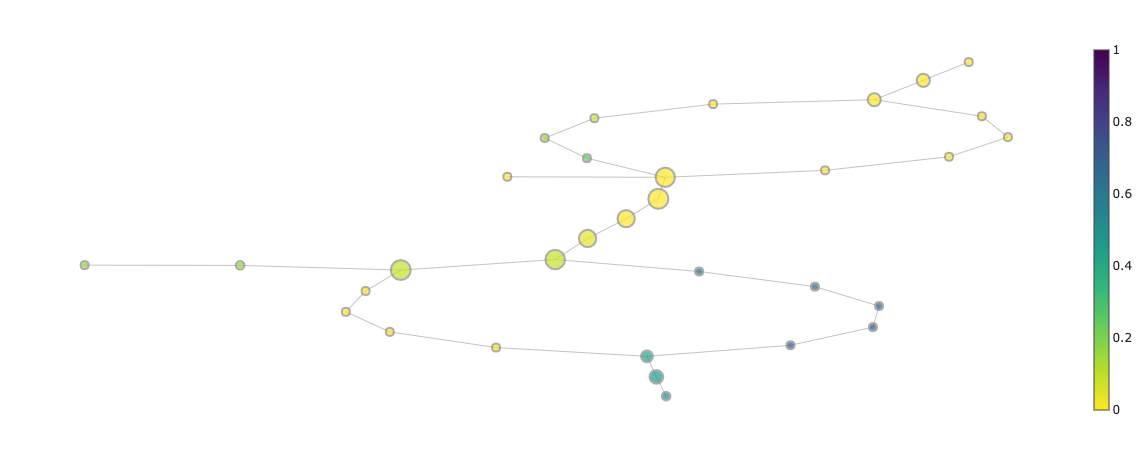

In [41]:
fig.show()